In [1]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# DF ACTIVITY

In [2]:
df = pd.read_csv("activity.csv")
del df['Unnamed: 0'] 
df = df[df['ActivityType'] != 'StrengthTraining']
df = df[df['ActivityType'] != 'Walking']
df = df[df['ActivityType'] != 'Yoga']
df = df[df['ActivityType'] != 'Kayak']
df = df[df['ActivityType'] != 'Swimming']
df = df.dropna()
df

,ActivityType,Duration(min),totalDistance(km),totalEnergyBurned(kcal),averageSpeed(km/h),BMI
0,Cycling,90.871452,28.572670,726.000000,18.865773,22.877406
1,Cycling,31.131966,10.923420,308.000000,21.052483,22.019503
2,Cycling,110.181803,37.696500,1040.000000,20.527800,22.019503
3,Cycling,27.341850,8.905270,241.000000,19.542064,22.019503
4,Cycling,28.687284,11.584800,358.000000,24.229829,22.019503
...,...,...,...,...,...,...
937,Cycling,50.593861,20.186837,505.113894,23.939866,23.449341
938,Cycling,16.308763,4.551423,75.102000,16.744703,23.449341
939,Cycling,16.103479,4.541209,75.988000,16.920103,23.449341
940,Cycling,58.247580,23.191472,563.620278,23.889204,23.449341


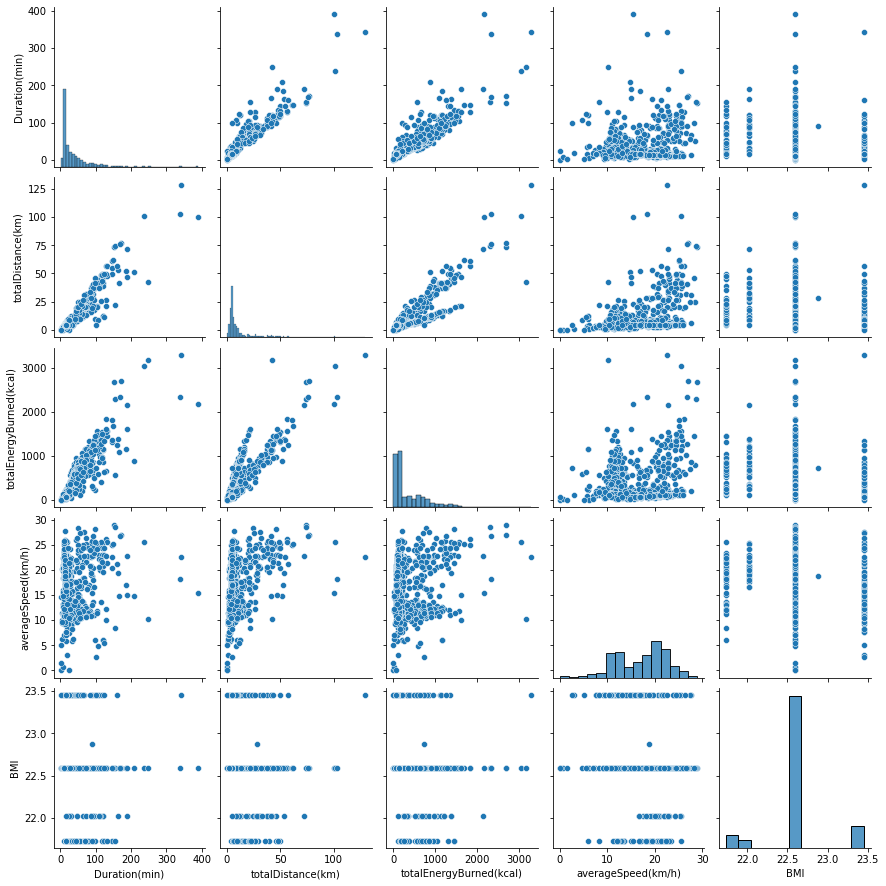

In [3]:
sns.pairplot(df)
plt.show()

In [4]:
df.corr()

,Duration(min),totalDistance(km),totalEnergyBurned(kcal),averageSpeed(km/h),BMI
Duration(min),1.000000,0.924621,0.898399,0.047902,-0.110966
totalDistance(km),0.924621,1.000000,0.878089,0.320447,-0.107456
totalEnergyBurned(kcal),0.898399,0.878089,1.000000,0.066533,-0.153603
averageSpeed(km/h),0.047902,0.320447,0.066533,1.000000,-0.122911
BMI,-0.110966,-0.107456,-0.153603,-0.122911,1.000000


# DFHR

In [5]:
import datetime
dfhr = pd.read_csv("hr_export.csv")
dfhr['dt'] = pd.to_datetime(dfhr['dt'])
dfhr['day_of_week_in_number'] = dfhr['dt'].dt.dayofweek

dfhr


,dt,bpm,day_of_week_in_number
0,2021-03-06 13:27:34,88,5
1,2021-03-06 13:32:23,67,5
2,2021-03-06 13:38:29,74,5
3,2021-03-06 13:38:34,75,5
4,2021-03-06 13:38:39,74,5
...,...,...,...
251242,2022-05-11 11:53:48,69,2
251243,2022-05-11 11:56:45,67,2
251244,2022-05-11 12:07:42,76,2
251245,2022-05-11 12:04:42,67,2


In [6]:
mondaydf = dfhr[dfhr['day_of_week_in_number']==0]
#mondaydf
tuesdaydf = dfhr[dfhr['day_of_week_in_number']==1]
#tuesdaydf
wednesdaydf = dfhr[dfhr['day_of_week_in_number']==2]
#wednesdaydf

thursdaydf = dfhr[dfhr['day_of_week_in_number']==3]
#thursdaydf

fridaydf = dfhr[dfhr['day_of_week_in_number']==4]
#fridaydf

saturdaydf = dfhr[dfhr['day_of_week_in_number']==5]
#saturdaydf

sundaydf = dfhr[dfhr['day_of_week_in_number']==6]
sundaydf

,dt,bpm,day_of_week_in_number
252,2021-03-07 00:00:52,102,6
253,2021-03-07 00:06:39,102,6
254,2021-03-07 00:12:38,83,6
255,2021-03-07 00:20:31,94,6
256,2021-03-07 00:23:49,92,6
...,...,...,...
248847,2022-01-09 13:05:59,130,6
249322,2022-01-09 19:03:07,152,6
249323,2022-01-09 19:14:40,155,6
249324,2022-01-09 19:24:35,158,6


In [7]:
mondaydf.set_index('dt', inplace=True)  
mondaydf.index = pd.to_datetime(mondaydf.index)    
df2 = mondaydf.resample(rule = '30Min').mean()

tuesdaydf.set_index('dt', inplace=True)  
tuesdaydf.index = pd.to_datetime(tuesdaydf.index)    
df3 = tuesdaydf.resample(rule = '30Min').mean()

wednesdaydf.set_index('dt', inplace=True)  
wednesdaydf.index = pd.to_datetime(wednesdaydf.index)    
df4 = wednesdaydf.resample(rule = '30Min').mean()


thursdaydf.set_index('dt', inplace=True)  
thursdaydf.index = pd.to_datetime(thursdaydf.index)    
df5 = thursdaydf.resample(rule = '30Min').mean()


fridaydf.set_index('dt', inplace=True)  
fridaydf.index = pd.to_datetime(fridaydf.index)    
df6 = fridaydf.resample(rule = '30Min').mean()


saturdaydf.set_index('dt', inplace=True)  
saturdaydf.index = pd.to_datetime(saturdaydf.index)    
df7 = saturdaydf.resample(rule = '30Min').mean()

sundaydf.set_index('dt', inplace=True)  
sundaydf.index = pd.to_datetime(sundaydf.index)    
df8 = sundaydf.resample(rule = '30Min').mean()

In [8]:
df8

,bpm,day_of_week_in_number
dt,,
2021-03-07 00:00:00,94.166667,6.0
2021-03-07 00:30:00,90.875000,6.0
2021-03-07 01:00:00,89.000000,6.0
2021-03-07 01:30:00,92.000000,6.0
2021-03-07 02:00:00,77.857143,6.0
...,...,...
2022-05-08 21:30:00,70.600000,6.0
2022-05-08 22:00:00,65.000000,6.0
2022-05-08 22:30:00,69.500000,6.0


# from 7am to 9pm

# Wednesday

In [10]:
wednesday0 = df4.between_time('07:00',  '07:30')
wednesday0.dropna()
AVGdfwednesday0 = wednesday0['bpm'].mean()
AVGdfwednesday0

72.86989561928586

In [11]:
wednesday1 = df4.between_time('07:30',  '08:00')
wednesday1.dropna()
AVGdfwednesday1 = wednesday1['bpm'].mean()
AVGdfwednesday1

74.07402138985154

In [12]:
wednesday2 = df4.between_time('08:00',  '08:30')
wednesday2.dropna()
AVGdfwednesday2 = wednesday2['bpm'].mean()
AVGdfwednesday2

74.37788540505254

In [13]:
wednesday3 = df4.between_time('08:30',  '09:00')
wednesday3.dropna()
AVGdfwednesday3 = wednesday3['bpm'].mean()
AVGdfwednesday3

76.06596810922413

In [14]:
wednesday4 = df4.between_time('09:00',  '09:30')
wednesday4.dropna()
AVGdfwednesday4 = wednesday4['bpm'].mean()
AVGdfwednesday4

76.89479771821473

In [15]:
wednesday5= df4.between_time('09:30',  '10:00')
wednesday5.dropna()
AVGdfwednesday5 = wednesday5['bpm'].mean()
AVGdfwednesday5

77.10082742863831

In [16]:
wednesday6= df4.between_time('10:00',  '10:30')
wednesday6.dropna()
AVGdfwednesday6 = wednesday6['bpm'].mean()
AVGdfwednesday6

77.47357656953625

In [17]:
wednesday7= df4.between_time('10:30',  '11:00')
wednesday7.dropna()
AVGdfwednesday7 = wednesday7['bpm'].mean()
AVGdfwednesday7

75.60840396575611

In [19]:
wednesday8 = df4.between_time('11:00',  '11:30')
wednesday8.dropna()
AVGdfwednesday8 = wednesday8['bpm'].mean()
AVGdfwednesday8

73.73913560892142

In [20]:
wednesday9 = df4.between_time('11:30',  '12:00')
wednesday9.dropna()
AVGdfwednesday9 = wednesday9['bpm'].mean()
AVGdfwednesday9

73.80471161008204

In [21]:
wednesday10 = df4.between_time('12:00',  '12:30')
wednesday10.dropna()
AVGdfwednesday10 = wednesday10['bpm'].mean()
AVGdfwednesday10

77.49439208134915

In [22]:
wednesday11 = df4.between_time('12:30',  '13:00')
wednesday11.dropna()
AVGdfwednesday11 = wednesday11['bpm'].mean()
AVGdfwednesday11

79.73522689913224

In [23]:
wednesday12 = df4.between_time('13:00',  '13:30')
wednesday12.dropna()
AVGdfwednesday12 = wednesday12['bpm'].mean()
AVGdfwednesday12

77.79815218479915

In [24]:
wednesday13 = df4.between_time('13:30',  '14:00')
wednesday13.dropna()
AVGdfwednesday13 = wednesday13['bpm'].mean()
AVGdfwednesday13

74.711265863799

In [25]:
wednesday14 = df4.between_time('14:00',  '14:30')
wednesday14.dropna()
AVGdfwednesday14 = wednesday14['bpm'].mean()
AVGdfwednesday14

73.70601747069537

In [26]:
wednesday15 = df4.between_time('14:30',  '15:00')
wednesday15.dropna()
AVGdfwednesday15 = wednesday15['bpm'].mean()
AVGdfwednesday15

74.72931411785527

In [27]:
wednesday16 = df4.between_time('15:00',  '15:30')
wednesday16.dropna()
AVGdfwednesday16 = wednesday16['bpm'].mean()
AVGdfwednesday16

75.59108835611538

In [28]:
wednesday17 = df4.between_time('15:30',  '16:00')
wednesday17.dropna()
AVGdfwednesday17 = wednesday17['bpm'].mean()
AVGdfwednesday17

73.2581936733229

In [29]:
wednesday18 = df4.between_time('16:00',  '16:30')
wednesday18.dropna()
AVGdfwednesday18 = wednesday18['bpm'].mean()
AVGdfwednesday18

73.89189875140744

In [30]:
wednesday19 = df4.between_time('16:30',  '17:00')
wednesday19.dropna()
AVGdfwednesday19 = wednesday19['bpm'].mean()
AVGdfwednesday19

77.74919683162163

In [31]:
wednesday20 = df4.between_time('17:00',  '17:30')
wednesday20.dropna()
AVGdfwednesday20 = wednesday20['bpm'].mean()
AVGdfwednesday20

77.13655001299126

In [32]:
wednesday21 = df4.between_time('17:30',  '18:00')
wednesday21.dropna()
AVGdfwednesday21 = wednesday21['bpm'].mean()
AVGdfwednesday21

76.31485547591197

In [33]:
wednesday22 = df4.between_time('18:00',  '18:30')
wednesday22.dropna()
AVGdfwednesday22 = wednesday22['bpm'].mean()
AVGdfwednesday22

79.20310793106692

In [34]:
wednesday23 = df4.between_time('18:30',  '19:00')
wednesday23.dropna()
AVGdfwednesday23 = wednesday23['bpm'].mean()
AVGdfwednesday23

80.83297550256073

In [35]:
wednesday24 = df4.between_time('19:00',  '19:30')
wednesday24.dropna()
AVGdfwednesday24 = wednesday24['bpm'].mean()
AVGdfwednesday24

79.91579331891974

In [36]:
wednesday25 = df4.between_time('19:30',  '20:00')
wednesday25.dropna()
AVGdfwednesday25 = wednesday25['bpm'].mean()
AVGdfwednesday25

78.90302860221703

In [37]:
wednesday26 = df4.between_time('20:00',  '20:30')
wednesday26.dropna()
AVGdfwednesday26 = wednesday26['bpm'].mean()
AVGdfwednesday26

77.3273979293872

In [38]:
wednesday27 = df4.between_time('20:30',  '21:00')
wednesday27.dropna()
AVGdfwednesday27 = wednesday27['bpm'].mean()
AVGdfwednesday27

75.92227457344438

# Tuesday

In [39]:
tuesday0 = df3.between_time('07:00',  '07:30')
tuesday0.dropna()
AVGdftuesday0 = tuesday0['bpm'].mean()
AVGdftuesday0

tuesday1 = df3.between_time('07:30',  '08:00')
tuesday1.dropna()
AVGdftuesday1 = tuesday1['bpm'].mean()
AVGdftuesday1

tuesday2 = df3.between_time('08:00',  '08:30')
tuesday2.dropna()
AVGdftuesday2 = tuesday2['bpm'].mean()
AVGdftuesday2

tuesday3 = df3.between_time('08:30',  '09:00')
tuesday3.dropna()
AVGdftuesday3 = tuesday3['bpm'].mean()
AVGdftuesday3

tuesday4 = df3.between_time('09:00',  '09:30')
tuesday4.dropna()
AVGdftuesday4 = tuesday4['bpm'].mean()
AVGdftuesday4

tuesday5= df3.between_time('09:30',  '10:00')
tuesday5.dropna()
AVGdftuesday5 = tuesday5['bpm'].mean()
AVGdftuesday5

tuesday6= df3.between_time('10:00',  '10:30')
tuesday6.dropna()
AVGdftuesday6 = tuesday6['bpm'].mean()
AVGdftuesday6

tuesday7= df3.between_time('10:30',  '11:00')
tuesday7.dropna()
AVGdftuesday7 = tuesday7['bpm'].mean()
AVGdftuesday7

tuesday8 = df3.between_time('11:00',  '11:30')
tuesday8.dropna()
AVGdftuesday8 = tuesday8['bpm'].mean()
AVGdftuesday8

tuesday9 = df3.between_time('11:30',  '12:00')
tuesday9.dropna()
AVGdftuesday9 = tuesday9['bpm'].mean()
AVGdftuesday9

tuesday10 = df3.between_time('12:00',  '12:30')
tuesday10.dropna()
AVGdftuesday10 = tuesday10['bpm'].mean()
AVGdftuesday10

tuesday11 = df3.between_time('12:30',  '13:00')
tuesday11.dropna()
AVGdftuesday11 = tuesday11['bpm'].mean()
AVGdftuesday11

tuesday12 = df3.between_time('13:00',  '13:30')
tuesday12.dropna()
AVGdftuesday12 = tuesday12['bpm'].mean()
AVGdftuesday12

tuesday13 = df3.between_time('13:30',  '14:00')
tuesday13.dropna()
AVGdftuesday13 = tuesday13['bpm'].mean()
AVGdftuesday13

tuesday14 = df3.between_time('14:00',  '14:30')
tuesday14.dropna()
AVGdftuesday14 = tuesday14['bpm'].mean()
AVGdftuesday14

tuesday15 = df3.between_time('14:30',  '15:00')
tuesday15.dropna()
AVGdftuesday15 = tuesday15['bpm'].mean()
AVGdftuesday15

tuesday16 = df3.between_time('15:00',  '15:30')
tuesday16.dropna()
AVGdftuesday16 = tuesday16['bpm'].mean()
AVGdftuesday16

tuesday17 = df3.between_time('15:30',  '16:00')
tuesday17.dropna()
AVGdftuesday17 = tuesday17['bpm'].mean()
AVGdftuesday17

tuesday18 = df3.between_time('16:00',  '16:30')
tuesday18.dropna()
AVGdftuesday18 = tuesday18['bpm'].mean()
AVGdftuesday18

tuesday19 = df3.between_time('16:30',  '17:00')
tuesday19.dropna()
AVGdftuesday19 = tuesday19['bpm'].mean()
AVGdftuesday19


tuesday20 = df3.between_time('17:00',  '17:30')
tuesday20.dropna()
AVGdftuesday20 = tuesday20['bpm'].mean()
AVGdftuesday20

tuesday21 = df3.between_time('17:30',  '18:00')
tuesday21.dropna()
AVGdftuesday21 = tuesday21['bpm'].mean()
AVGdftuesday21

tuesday22 = df3.between_time('18:00',  '18:30')
tuesday22.dropna()
AVGdftuesday22 = tuesday22['bpm'].mean()
AVGdftuesday22

tuesday23 = df3.between_time('18:30',  '19:00')
tuesday23.dropna()
AVGdftuesday23 = tuesday23['bpm'].mean()
AVGdftuesday23

tuesday24 = df3.between_time('19:00',  '19:30')
tuesday24.dropna()
AVGdftuesday24 = tuesday24['bpm'].mean()
AVGdftuesday24

tuesday25 = df3.between_time('19:30',  '20:00')
tuesday25.dropna()
AVGdftuesday25 = tuesday25['bpm'].mean()
AVGdftuesday25

tuesday26 = df3.between_time('20:00',  '20:30')
tuesday26.dropna()
AVGdftuesday26 = tuesday26['bpm'].mean()
AVGdftuesday26

tuesday27 = df3.between_time('20:30',  '21:00')
tuesday27.dropna()
AVGdftuesday27 = tuesday27['bpm'].mean()
AVGdftuesday27

79.88082129353843

# Monday 

In [40]:
monday25 = df2.between_time('07:00',  '07:30')
monday25.dropna()
AVGdfmonday25 = monday25['bpm'].mean()
AVGdfmonday25

75.34266003161353

In [41]:
monday0 = df2.between_time('07:30',  '08:00')
monday0.dropna()
AVGdfmonday0 = monday0['bpm'].mean()
AVGdfmonday0

75.19042028356907

In [42]:
monday830 = df2.between_time('08:00',  '08:30')
monday830.dropna()
AVGdfmonday830 = monday830['bpm'].mean()
AVGdfmonday830

75.31691318358605

In [43]:
monday8309 = df2.between_time('08:30',  '09:00')
monday8309.dropna()
AVGdfmonday8309 = monday8309['bpm'].mean()
AVGdfmonday8309

79.38868798326224

In [44]:
monday930 = df2.between_time('09:00',  '09:30')
monday930.dropna()
AVGdfmonday930 = monday930['bpm'].mean()
AVGdfmonday930

79.29430468025186

In [45]:
monday9301 = df2.between_time('09:30',  '10:00')
monday9301.dropna()
AVGdfmonday9301 = monday9301['bpm'].mean()
AVGdfmonday9301

75.57384180137025

In [46]:
monday1030 = df2.between_time('10:00',  '10:30')
monday1030.dropna()
AVGdfmonday1030 = monday1030['bpm'].mean()
AVGdfmonday1030

73.64770940776351

In [47]:
monday103011 = df2.between_time('10:30',  '11:00')
monday103011.dropna()
AVGdfmonday103011 = monday103011['bpm'].mean()
AVGdfmonday103011

72.92338318949166

In [48]:
monday1130 = df2.between_time('11:00',  '11:30')
monday1130.dropna()
AVGdfmonday1130 = monday1130['bpm'].mean()
AVGdfmonday1130

72.06497410050821

In [49]:
monday113012 = df2.between_time('11:30','12:00')
monday113012.dropna()
AVGdfmonday113012 = monday113012['bpm'].mean()
AVGdfmonday113012

72.24607186101358

In [50]:
dfmonday1230 = df2.between_time('12:00','12:30')
dfmonday1230.dropna()
AVGdfmonday1230 = dfmonday1230['bpm'].mean()
AVGdfmonday1230

75.18685423155956

In [51]:
dfmonday10 = df2.between_time('12:30','13:00')
dfmonday10.dropna()
AVGdfmonday10 = dfmonday10['bpm'].mean()
AVGdfmonday10

76.13330994798916

In [52]:
dfmonday11 = df2.between_time('13:00','13:30')
dfmonday11.dropna()
AVGdfmonday11 = dfmonday11['bpm'].mean()
AVGdfmonday11

73.83519064483662

In [53]:
dfmonday12 = df2.between_time('13:30','14:00')
dfmonday12.dropna()
AVGdfmonday12 = dfmonday12['bpm'].mean()
AVGdfmonday12

74.5307184835743

In [54]:
dfmonday13 = df2.between_time('14:00','14:30')
dfmonday13.dropna()
AVGdfmonday13 = dfmonday13['bpm'].mean()
AVGdfmonday13

77.74071206341239

In [55]:
dfmonday14 = df2.between_time('14:30','15:00')
dfmonday14.dropna()
AVGdfmonday14 = dfmonday14['bpm'].mean()
AVGdfmonday14

78.61767234506402

In [56]:
dfmonday15 = df2.between_time('15:00','15:30')
dfmonday15.dropna()
AVGdfmonday15 = dfmonday15['bpm'].mean()
AVGdfmonday15

78.70506295091589

In [57]:
dfmonday16 = df2.between_time('15:30','16:00')
dfmonday16.dropna()
AVGdfmonday16 = dfmonday16['bpm'].mean()
AVGdfmonday16

78.66156431042364

In [58]:
dfmonday17 = df2.between_time('16:00','16:30')
dfmonday17.dropna()
AVGdfmonday17 = dfmonday17['bpm'].mean()
AVGdfmonday17

79.84822609213089

In [59]:
dfmonday18 = df2.between_time('16:30','17:00')
dfmonday18.dropna()
AVGdfmonday18 = dfmonday18['bpm'].mean()
AVGdfmonday18

80.30257992260476

In [60]:
dfmonday19 = df2.between_time('17:00','17:30')
dfmonday19.dropna()
AVGdfmonday19 = dfmonday19['bpm'].mean()
AVGdfmonday19

78.18863848099143

In [61]:
dfmonday20 = df2.between_time('17:30','18:00')
dfmonday20.dropna()
AVGdfmonday20 = dfmonday20['bpm'].mean()
AVGdfmonday20

76.25619880089947

In [62]:
dfmonday21 = df2.between_time('18:00','18:30')
dfmonday21.dropna()
AVGdfmonday21 = dfmonday21['bpm'].mean()
AVGdfmonday21

76.74110624996045

In [63]:
dfmonday22 = df2.between_time('18:30','19:00')
dfmonday22.dropna()
AVGdfmonday22 = dfmonday22['bpm'].mean()
AVGdfmonday22

76.45978684625129

In [64]:
dfmonday23 = df2.between_time('19:00','19:30')
dfmonday23.dropna()
AVGdfmonday23 = dfmonday23['bpm'].mean()
AVGdfmonday23

74.97144791263703

In [65]:
dfmonday24 = df2.between_time('19:30','20:00')
dfmonday24.dropna()
AVGdfmonday24 = dfmonday24['bpm'].mean()
AVGdfmonday24

77.39014759982837

In [66]:
dfmonday25 = df2.between_time('20:00','20:30')
dfmonday25.dropna()
AVGdfmonday25 = dfmonday25['bpm'].mean()
AVGdfmonday25

76.95318623521466

In [67]:
dfmonday26 = df2.between_time('20:30','21:00')
dfmonday26.dropna()
AVGdfmonday26 = dfmonday26['bpm'].mean()
AVGdfmonday26

74.93073268602481

time to find a way to build a for loop

In [68]:
import datetime
from datetime import timedelta

In [69]:
dep_time = datetime.time(hour = 7,minute = 0 )
print(dep_time)

time = dep_time.strftime("%H:%M:%S")
print("time:", time)

07:00:00
time: 07:00:00


# Thursday

In [79]:
import datetime
from datetime import timedelta
box_list = []

def loop():
    for i in range(29):
        
        dep_time = datetime.datetime(year= 2021, month = 1, day = 1, hour = 7,minute = 0 )
        end_time = datetime.datetime(year= 2021, month = 1, day = 1, hour = 7,minute = 30 )
        x=0
        dep_time = dep_time + timedelta(minutes=30*i)
        end_time = end_time + timedelta(minutes=30*i)
        
        dep_time_str = dep_time.strftime("%H:%M")
        end_time_str = end_time.strftime("%H:%M")
        
        globals()[f"dfthursday{i}"] = df5.between_time(dep_time_str,end_time_str)

        globals()[f"dfthursday{i}"].dropna()
        globals()[f"AVGthursday{i}"] =  globals()[f"dfthursday{i}"]['bpm'].mean()
        box_list.append(globals()[f"AVGthursday{i}"])
        print(globals()[f"AVGthursday{i}"])
loop()

    

70.53879545354614
75.55378945214048
75.11253903117591
73.52333018888338
71.5159278099275
72.88903558434299
78.91294345844462
82.35261470275556
81.69792089762055
78.08113186105635
75.89742019358683
74.50318439367538
75.11461879508826
76.76130811720407
76.17414042150672
78.37166407438232
80.72499121065223
81.0232797396651
81.99081190100888
83.24111182793351
83.79264949419745
81.85155002403539
77.19576356532333
73.57771805526475
77.43595843751474
81.58442232287375
79.39247695174872
74.85536809538155
72.77657396459797


In [71]:
boxlistdf = pd.DataFrame (box_list)
boxlistdf = boxlistdf.T
print(boxlistdf.iloc[0][28])

72.77657396459797


# Friday

In [78]:
box_list2 = []
def loop2():
    for i in range(29):
        
        dep_time = datetime.datetime(year= 2021, month = 1, day = 1, hour = 7,minute = 0 )
        end_time = datetime.datetime(year= 2021, month = 1, day = 1, hour = 7,minute = 30 )
        x=0
        dep_time = dep_time + timedelta(minutes=30*i)
        end_time = end_time + timedelta(minutes=30*i)
        
        dep_time_str = dep_time.strftime("%H:%M")
        end_time_str = end_time.strftime("%H:%M")
        
        globals()[f"dffriday{i}"] = df6.between_time(dep_time_str,end_time_str)

        globals()[f"dffriday{i}"].dropna()
        globals()[f"AVGfriday{i}"] =  globals()[f"dffriday{i}"]['bpm'].mean()
        box_list2.append(globals()[f"AVGfriday{x}"])
        print(globals()[f"AVGfriday{i}"])
loop2()

73.78993005121596
73.71397260077659
72.8561307823261
75.3471986899076
75.12130450027296
72.96534665075394
73.44636808771354
72.52540173989702
71.66633604717704
71.97989040453561
72.60367896642575
73.76405028785874
73.62373600402259
73.32790934547086
72.02192000571851
72.22110542209397
75.20659601171658
78.61536353624714
81.28382519196353
81.7634314683575
81.45081181695039
82.62326800005117
82.13771730858845
78.57123757548923
76.73203304015074
77.92998132601231
80.96910642452376
79.9425377390155
75.42650407918522


In [81]:
AVGfriday5

72.96534665075394

# Saturday

In [84]:
box_list3 = []
def loop3():
    for i in range(29):
        
        dep_time = datetime.datetime(year= 2021, month = 1, day = 1, hour = 7,minute = 0 )
        end_time = datetime.datetime(year= 2021, month = 1, day = 1, hour = 7,minute = 30 )
        x=0
        dep_time = dep_time + timedelta(minutes=30*i)
        end_time = end_time + timedelta(minutes=30*i)
        
        dep_time_str = dep_time.strftime("%H:%M")
        end_time_str = end_time.strftime("%H:%M")
        
        globals()[f"dfsaturday{i}"] = df7.between_time(dep_time_str,end_time_str)

        globals()[f"dfsaturday{i}"].dropna()
        globals()[f"AVGsaturday{i}"] =  globals()[f"dfsaturday{i}"]['bpm'].mean()
        box_list2.append(globals()[f"AVGsaturday{i}"])
        print(globals()[f"AVGsaturday{i}"])
loop3()

79.82539682539684
77.23968253968253
73.26759225429302
70.5368286112259
71.83915223882549
76.89720465590591
85.85266012906108
91.14785299079398
88.73662802500202
83.57581672402074
80.50644505718942
78.21696480995922
76.61915365828735
76.41751065365477
77.96440702651422
82.03587494549204
86.83668178612707
89.74105026515919
87.3849400912089
82.71318138957912
82.04222100270495
85.40093844528353
84.63856916704152
80.50629264893635
77.8571316398751
76.26593434021993
74.78811686332268
75.18070399882014
74.30150648908665


# Sunday

In [88]:
box_list4 = []
def loop4():
    for i in range(29):
        
        dep_time = datetime.datetime(year= 2021, month = 1, day = 1, hour = 7,minute = 0 )
        end_time = datetime.datetime(year= 2021, month = 1, day = 1, hour = 7,minute = 30 )
        x=0
        dep_time = dep_time + timedelta(minutes=30*i)
        end_time = end_time + timedelta(minutes=30*i)
        
        dep_time_str = dep_time.strftime("%H:%M")
        end_time_str = end_time.strftime("%H:%M")
        
        globals()[f"dfsunday{i}"] = df8.between_time(dep_time_str,end_time_str)

        globals()[f"dfsunday{i}"].dropna()
        globals()[f"AVGsunday{i}"] =  globals()[f"dfsunday{i}"]['bpm'].mean()
        box_list2.append(globals()[f"AVGsunday{i}"])
        print(globals()[f"AVGsunday{i}"])
loop4()

73.93333333333332
73.92772108843535
70.66446655397743
69.03229344006768
73.46150102891599
79.66618659226515
82.47280824691974
84.28528344172469
87.80586887592439
89.70605981942091
86.3128147561395
82.20773677416189
80.24357695600987
80.42673410730751
82.60621519526198
81.86595200069239
79.30159224754966
78.92674634775206
79.67477007158328
78.88753829564085
77.2994539359032
79.36987395655761
82.65752169884308
80.53709662456326
77.8604129263053
77.69784350411967
75.74865980417695
75.86633559223912
76.62457819535122


In [89]:
data = {
    "Monday":[AVGdfmonday25,AVGdfmonday0,AVGdfmonday830,AVGdfmonday8309,AVGdfmonday930,AVGdfmonday9301,AVGdfmonday1030,AVGdfmonday103011,AVGdfmonday1130,AVGdfmonday113012,AVGdfmonday1230,AVGdfmonday10,AVGdfmonday11,AVGdfmonday12,AVGdfmonday13,AVGdfmonday14,AVGdfmonday15,AVGdfmonday16,AVGdfmonday17,AVGdfmonday18,AVGdfmonday19,AVGdfmonday20,AVGdfmonday21,AVGdfmonday22,AVGdfmonday23,AVGdfmonday24,AVGdfmonday25,AVGdfmonday26],
    "Tuesday":[AVGdftuesday0,AVGdftuesday1,AVGdftuesday2,AVGdftuesday3,AVGdftuesday4,AVGdftuesday5,AVGdftuesday6,AVGdftuesday7,AVGdftuesday8,AVGdftuesday9,AVGdftuesday10,AVGdftuesday11,AVGdftuesday12,AVGdftuesday13,AVGdftuesday14,AVGdftuesday15,AVGdftuesday16,AVGdftuesday17,AVGdftuesday18,AVGdftuesday19,AVGdftuesday20,AVGdftuesday21,AVGdftuesday22,AVGdftuesday23,AVGdftuesday24,AVGdftuesday25,AVGdftuesday26,AVGdftuesday27],
    "Wednesday":[AVGdfwednesday0, AVGdfwednesday1, AVGdfwednesday2, AVGdfwednesday3, AVGdfwednesday4, AVGdfwednesday5, AVGdfwednesday6, AVGdfwednesday7, AVGdfwednesday8, AVGdfwednesday9, AVGdfwednesday10, AVGdfwednesday11, AVGdfwednesday12, AVGdfwednesday13, AVGdfwednesday14, AVGdfwednesday15, AVGdfwednesday16, AVGdfwednesday17, AVGdfwednesday18, AVGdfwednesday19, AVGdfwednesday20, AVGdfwednesday21, AVGdfwednesday22, AVGdfwednesday23, AVGdfwednesday24, AVGdfwednesday25, AVGdfwednesday26, AVGdfwednesday27],
    "Thursday":[boxlistdf.iloc[0][0],boxlistdf.iloc[0][1],boxlistdf.iloc[0][2],boxlistdf.iloc[0][3],boxlistdf.iloc[0][4], boxlistdf.iloc[0][5], boxlistdf.iloc[0][6], boxlistdf.iloc[0][7], boxlistdf.iloc[0][8],boxlistdf.iloc[0][9],boxlistdf.iloc[0][10],boxlistdf.iloc[0][11],boxlistdf.iloc[0][12],boxlistdf.iloc[0][13],boxlistdf.iloc[0][14], boxlistdf.iloc[0][15],boxlistdf.iloc[0][17],boxlistdf.iloc[0][18],boxlistdf.iloc[0][19],boxlistdf.iloc[0][20],boxlistdf.iloc[0][21], boxlistdf.iloc[0][22],boxlistdf.iloc[0][23],boxlistdf.iloc[0][24],boxlistdf.iloc[0][25],boxlistdf.iloc[0][26],boxlistdf.iloc[0][27],boxlistdf.iloc[0][28]],    
    "Friday":[AVGfriday0, AVGfriday1, AVGfriday2 ,AVGfriday3 ,AVGfriday4, AVGfriday5,AVGfriday6, AVGfriday7, AVGfriday8, AVGfriday9, AVGfriday10, AVGfriday11, AVGfriday12, AVGfriday13, AVGfriday14, AVGfriday15, AVGfriday16, AVGfriday17, AVGfriday18, AVGfriday19, AVGfriday20, AVGfriday21, AVGfriday22, AVGfriday23, AVGfriday24, AVGfriday25, AVGfriday26, AVGfriday27],
    "Saturday":[AVGsaturday0, AVGsaturday1, AVGsaturday2, AVGsaturday3, AVGsaturday4, AVGsaturday5, AVGsaturday6, AVGsaturday7, AVGsaturday8, AVGsaturday9, AVGsaturday10, AVGsaturday11, AVGsaturday12, AVGsaturday13, AVGsaturday14, AVGsaturday15, AVGsaturday16, AVGsaturday17, AVGsaturday18, AVGsaturday19, AVGsaturday20, AVGsaturday21, AVGsaturday22, AVGsaturday23, AVGsaturday24, AVGsaturday25, AVGsaturday26, AVGsaturday27],
    "Sunday":[AVGsunday0, AVGsunday1, AVGsunday2, AVGsunday3, AVGsunday4, AVGsunday5, AVGsunday6, AVGsunday7, AVGsunday8, AVGsunday9, AVGsunday10, AVGsunday11, AVGsunday12, AVGsunday13, AVGsunday14, AVGsunday15, AVGsunday16, AVGsunday17, AVGsunday18, AVGsunday19, AVGsunday20, AVGsunday21, AVGsunday22, AVGsunday23, AVGsunday24, AVGsunday25, AVGsunday26, AVGsunday27],
}
df_ = pd.DataFrame(data, index=['07:00 - 07:30','07:30 - 08:00','08:00 - 08:30','08:30 - 09:00','09:00 - 09:30','09:30 - 10:00','10:00 - 10:30','10:30 - 11:00','11:00 - 11:30','11:30 - 12:00','12:00 - 12:30','12:30 - 13:00','13:00 - 13:30', '13:30 - 14:00', '14:00 - 14:30', '14:30 - 15:00', '15:00 - 15:30', '15:30 - 16:00', '16:00 - 16:30', '16:30 - 17:00','17:00 - 17:30', '17:30 - 18:00', '18:00 - 18:30', '18:30 - 19:00', '19:00 - 19:30', '19:30 - 20:00', '20:00 - 20:30','20:30 - 21:00'])

print (df_)

                  Monday    Tuesday  Wednesday   Thursday     Friday  \
07:00 - 07:30  76.953186  75.629937  72.869896  70.538795  73.789930   
07:30 - 08:00  75.190420  78.866566  74.074021  75.553789  73.713973   
08:00 - 08:30  75.316913  79.369711  74.377885  75.112539  72.856131   
08:30 - 09:00  79.388688  82.568168  76.065968  73.523330  75.347199   
09:00 - 09:30  79.294305  79.075790  76.894798  71.515928  75.121305   
09:30 - 10:00  75.573842  74.176276  77.100827  72.889036  72.965347   
10:00 - 10:30  73.647709  75.536429  77.473577  78.912943  73.446368   
10:30 - 11:00  72.923383  76.624002  75.608404  82.352615  72.525402   
11:00 - 11:30  72.064974  77.924855  73.739136  81.697921  71.666336   
11:30 - 12:00  72.246072  77.037519  73.804712  78.081132  71.979890   
12:00 - 12:30  75.186854  78.065282  77.494392  75.897420  72.603679   
12:30 - 13:00  76.133310  78.515172  79.735227  74.503184  73.764050   
13:00 - 13:30  73.835191  76.716351  77.798152  75.114619  73.62

<AxesSubplot:>

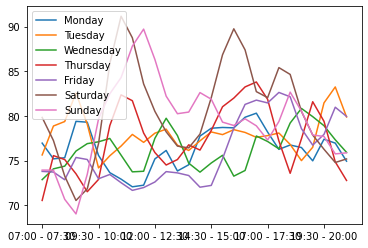

In [90]:
df_.plot()

In [91]:
df_.to_csv("dailyaveragebpm.csv")